# **Decision Tree Regressor and Prunning Implementation using Diabetes Data set

---



In [710]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.datasets import load_diabetes
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn import tree
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import warnings
warnings.filterwarnings('ignore')


In [711]:
#Diabetes data set
from sklearn.datasets import load_diabetes
diabetes_df = load_diabetes()

In [712]:
diabetes_df

{'data': array([[ 0.03807591,  0.05068012,  0.06169621, ..., -0.00259226,
          0.01990749, -0.01764613],
        [-0.00188202, -0.04464164, -0.05147406, ..., -0.03949338,
         -0.06833155, -0.09220405],
        [ 0.08529891,  0.05068012,  0.04445121, ..., -0.00259226,
          0.00286131, -0.02593034],
        ...,
        [ 0.04170844,  0.05068012, -0.01590626, ..., -0.01107952,
         -0.04688253,  0.01549073],
        [-0.04547248, -0.04464164,  0.03906215, ...,  0.02655962,
          0.04452873, -0.02593034],
        [-0.04547248, -0.04464164, -0.0730303 , ..., -0.03949338,
         -0.00422151,  0.00306441]]),
 'target': array([151.,  75., 141., 206., 135.,  97., 138.,  63., 110., 310., 101.,
         69., 179., 185., 118., 171., 166., 144.,  97., 168.,  68.,  49.,
         68., 245., 184., 202., 137.,  85., 131., 283., 129.,  59., 341.,
         87.,  65., 102., 265., 276., 252.,  90., 100.,  55.,  61.,  92.,
        259.,  53., 190., 142.,  75., 142., 155., 225.,  59

In [713]:
df = pd.DataFrame(diabetes_df.data, columns = diabetes_df.feature_names)
df['Target'] = diabetes_df.target

In [714]:
df.head()

age       sex       bmi        bp        s1        s2        s3  \
0  0.038076  0.050680  0.061696  0.021872 -0.044223 -0.034821 -0.043401   
1 -0.001882 -0.044642 -0.051474 -0.026328 -0.008449 -0.019163  0.074412   
2  0.085299  0.050680  0.044451 -0.005670 -0.045599 -0.034194 -0.032356   
3 -0.089063 -0.044642 -0.011595 -0.036656  0.012191  0.024991 -0.036038   
4  0.005383 -0.044642 -0.036385  0.021872  0.003935  0.015596  0.008142   

         s4        s5        s6  Target  
0 -0.002592  0.019907 -0.017646   151.0  
1 -0.039493 -0.068332 -0.092204    75.0  
2 -0.002592  0.002861 -0.025930   141.0  
3  0.034309  0.022688 -0.009362   206.0  
4 -0.002592 -0.031988 -0.046641   135.0

In [715]:
df.shape

(442, 11)

In [716]:
df.info

<bound method DataFrame.info of           age       sex       bmi        bp        s1        s2        s3  \
0    0.038076  0.050680  0.061696  0.021872 -0.044223 -0.034821 -0.043401   
1   -0.001882 -0.044642 -0.051474 -0.026328 -0.008449 -0.019163  0.074412   
2    0.085299  0.050680  0.044451 -0.005670 -0.045599 -0.034194 -0.032356   
3   -0.089063 -0.044642 -0.011595 -0.036656  0.012191  0.024991 -0.036038   
4    0.005383 -0.044642 -0.036385  0.021872  0.003935  0.015596  0.008142   
..        ...       ...       ...       ...       ...       ...       ...   
437  0.041708  0.050680  0.019662  0.059744 -0.005697 -0.002566 -0.028674   
438 -0.005515  0.050680 -0.015906 -0.067642  0.049341  0.079165 -0.028674   
439  0.041708  0.050680 -0.015906  0.017293 -0.037344 -0.013840 -0.024993   
440 -0.045472 -0.044642  0.039062  0.001215  0.016318  0.015283 -0.028674   
441 -0.045472 -0.044642 -0.073030 -0.081413  0.083740  0.027809  0.173816   

           s4        s5        s6  Target  
0   -0.002592  0.019907 -0.017646   151.0  
1   -0.039493 -0.068332 -0.092204    75.0  
2   -0.002592  0.002861 -0.025930   141.0  
3    0.034309  0.022688 -0.009362   206.0  
4   -0.002592 -0.031988 -0.046641   135.0  
..        ...       ...       ...     ...  
437 -0.002592  0.031193  0.007207   178.0  
438  0.034309 -0.018114  0.044485   104.0  
439 -0.011080 -0.046883  0.015491   132.0  
440  0.026560  0.044529 -0.025930   220.0  
441 -0.039493 -0.004222  0.003064    57.0  

[442 rows x 11 columns]>

In [717]:
df.dtypes

age       float64
sex       float64
bmi       float64
bp        float64
s1        float64
s2        float64
s3        float64
s4        float64
s5        float64
s6        float64
Target    float64
dtype: object

In [718]:
df.isnull().sum()

age       0
sex       0
bmi       0
bp        0
s1        0
s2        0
s3        0
s4        0
s5        0
s6        0
Target    0
dtype: int64

In [719]:
df.duplicated().sum()

0

In [720]:
# Summary statistics of numerical features
print("Summary Statistics:")
# Customize the appearance using a color palette
styled_summary = df.describe().T.style.background_gradient(cmap="Set1")

# Display the styled summary
styled_summary

Summary Statistics:


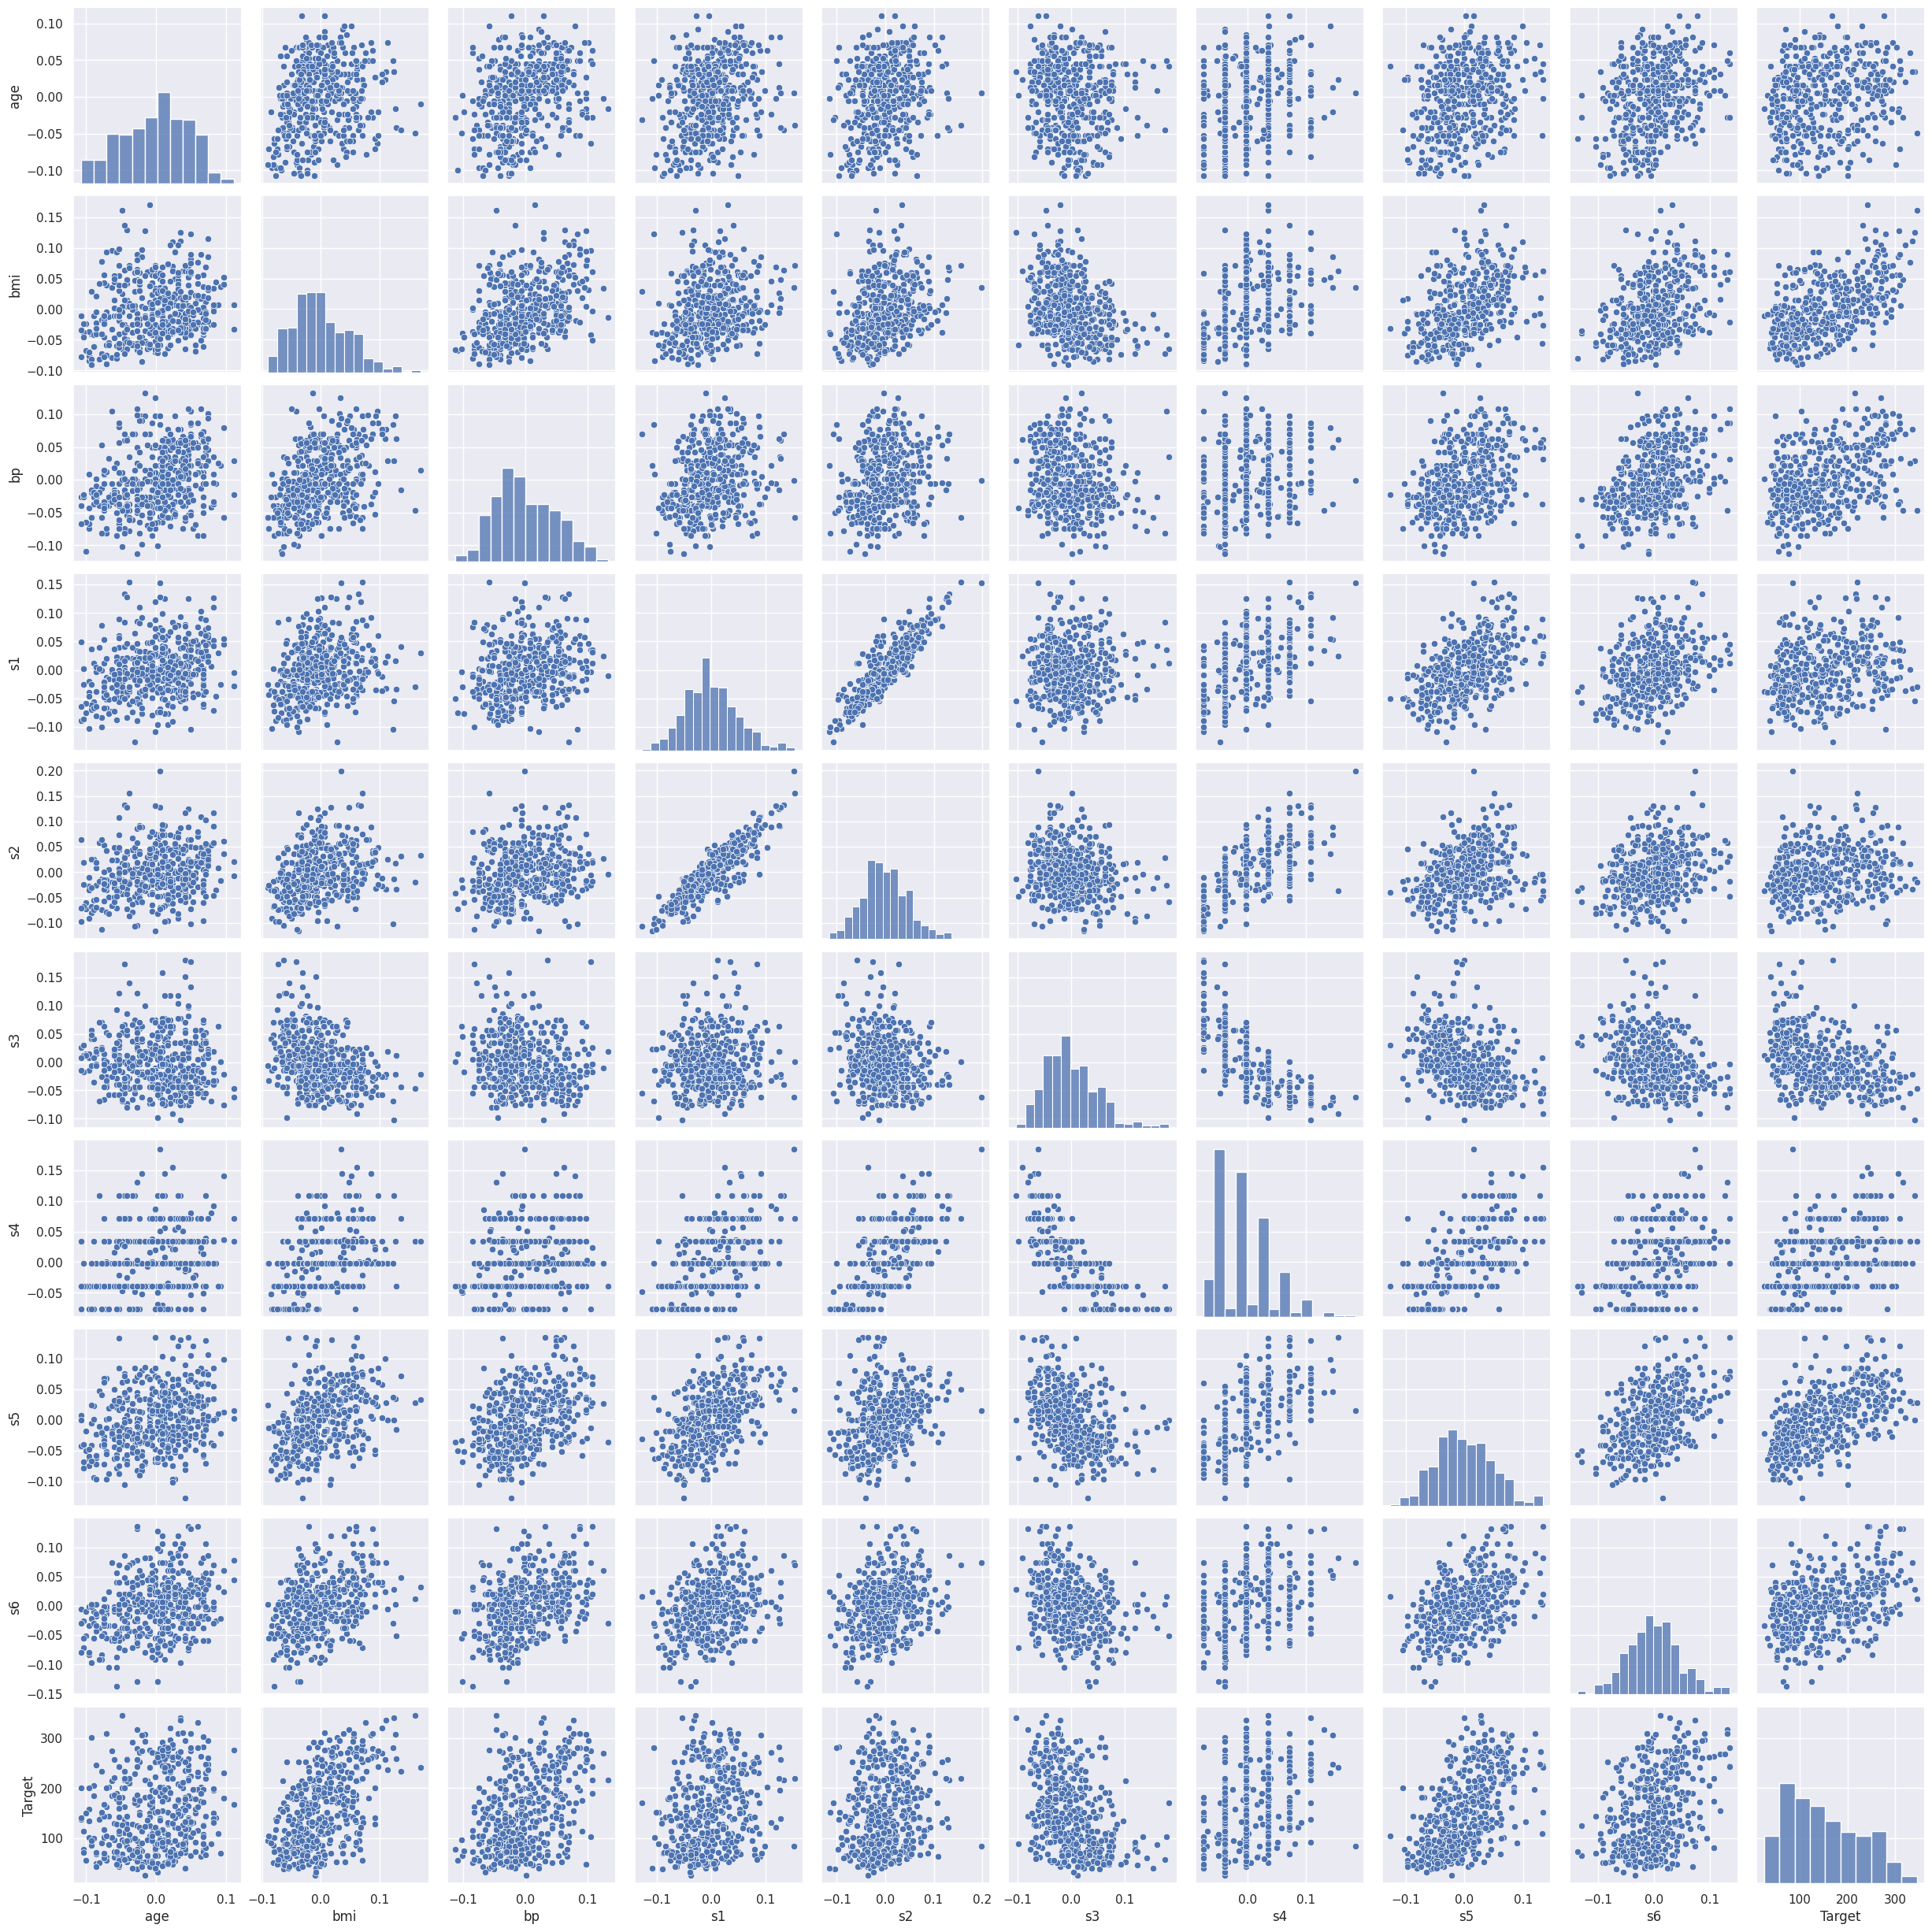

In [721]:
# Pair Plot
sns.pairplot(df, vars=['age', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6', 'Target'])
plt.show()


In [722]:
# Correlation Matrix
corr_matrix = df.corr()
print(corr_matrix)

             age       sex       bmi        bp        s1        s2        s3  \
age     1.000000  0.173737  0.185085  0.335428  0.260061  0.219243 -0.075181   
sex     0.173737  1.000000  0.088161  0.241010  0.035277  0.142637 -0.379090   
bmi     0.185085  0.088161  1.000000  0.395411  0.249777  0.261170 -0.366811   
bp      0.335428  0.241010  0.395411  1.000000  0.242464  0.185548 -0.178762   
s1      0.260061  0.035277  0.249777  0.242464  1.000000  0.896663  0.051519   
s2      0.219243  0.142637  0.261170  0.185548  0.896663  1.000000 -0.196455   
s3     -0.075181 -0.379090 -0.366811 -0.178762  0.051519 -0.196455  1.000000   
s4      0.203841  0.332115  0.413807  0.257650  0.542207  0.659817 -0.738493   
s5      0.270774  0.149916  0.446157  0.393480  0.515503  0.318357 -0.398577   
s6      0.301731  0.208133  0.388680  0.390430  0.325717  0.290600 -0.273697   
Target  0.187889  0.043062  0.586450  0.441482  0.212022  0.174054 -0.394789   

              s4        s5        s6   

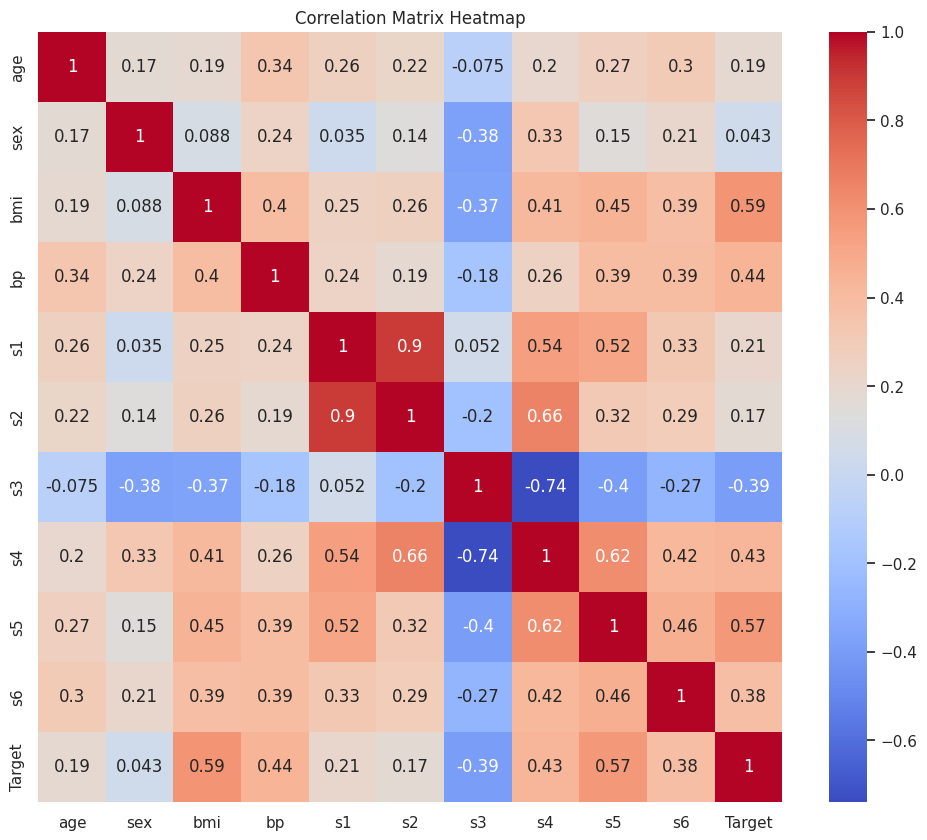

In [723]:
# Heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix Heatmap')
plt.show()

In [724]:
# Generate a categorical variable for demonstration
df['High_BMI'] = pd.cut(df['bmi'], bins=[-np.inf, 0, 0.1, 0.2, 0.3, np.inf], labels=['Very Low', 'Low', 'Medium', 'High', 'Very High'])


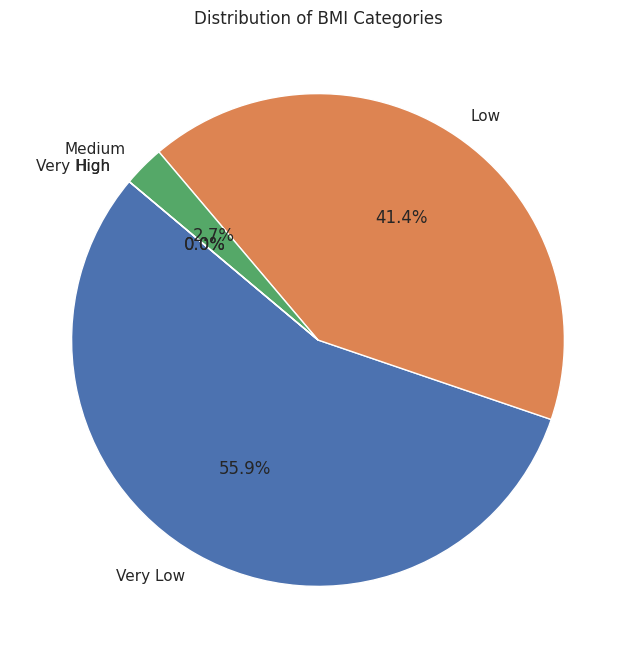

In [725]:
# Pie Plot
high_bmi_counts = df['High_BMI'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(high_bmi_counts, labels=high_bmi_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of BMI Categories')
plt.show()

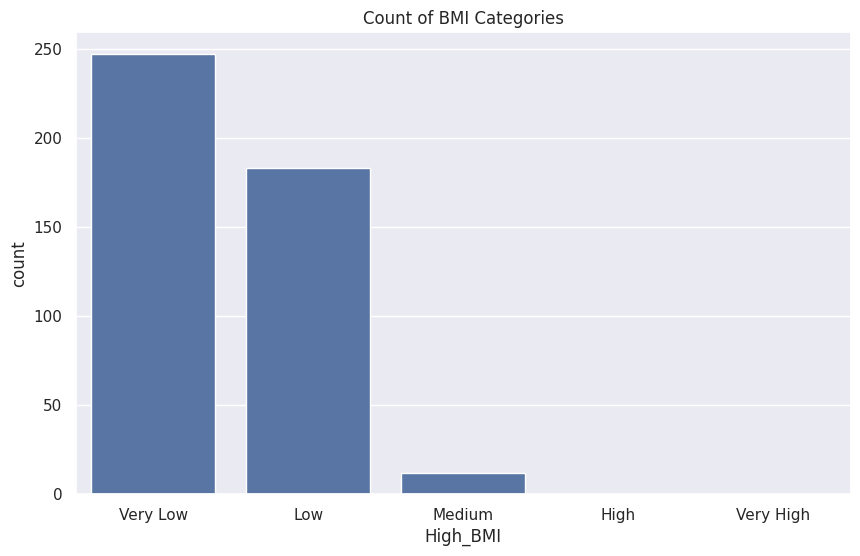

In [726]:
# Count Plot
plt.figure(figsize=(10, 6))
sns.countplot(x='High_BMI', data=df)
plt.title('Count of BMI Categories')
plt.show()

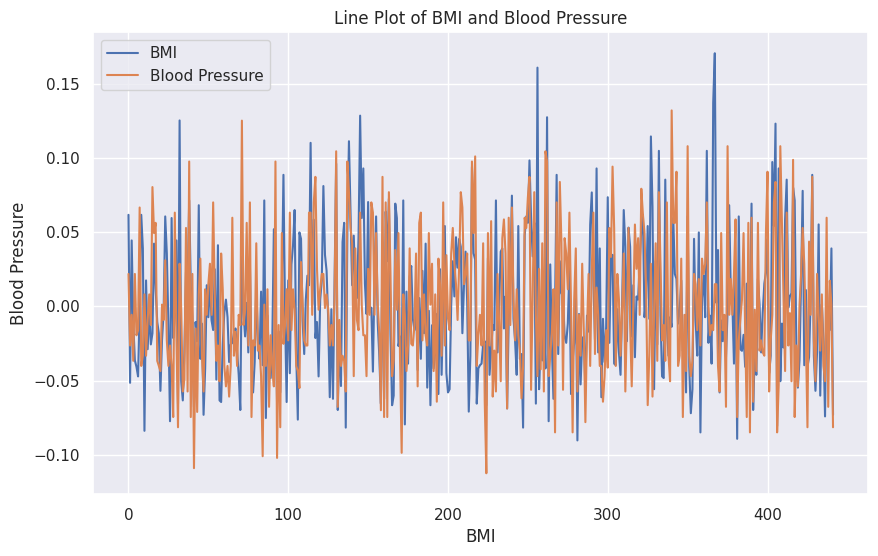

In [727]:
# Line Plot
plt.figure(figsize=(10, 6))
plt.plot(df.index, df['bmi'], label='BMI')
plt.plot(df.index, df['bp'], label='Blood Pressure')
plt.xlabel('BMI')
plt.ylabel('Blood Pressure')
plt.legend()
plt.title('Line Plot of BMI and Blood Pressure')
plt.show()

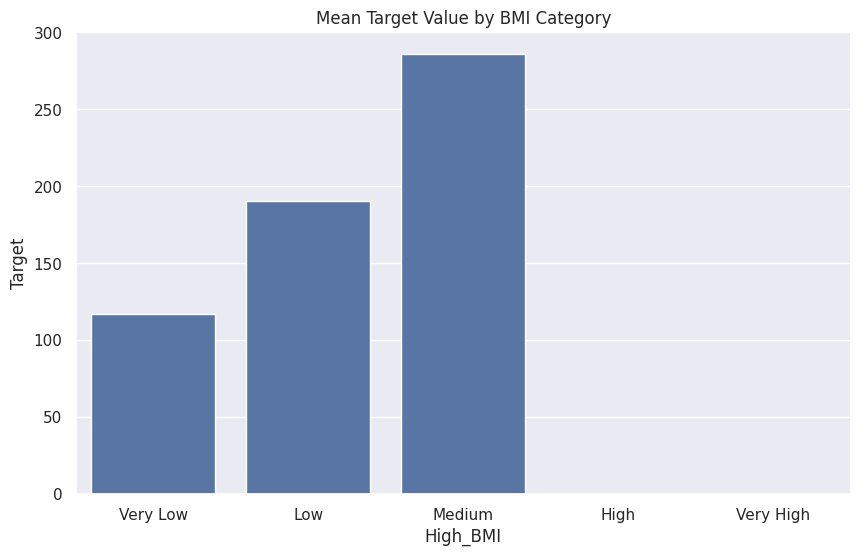

In [728]:
# Bar Plot
mean_target_by_bmi_category = df.groupby('High_BMI')['Target'].mean().reset_index()
plt.figure(figsize=(10, 6))
sns.barplot(x='High_BMI', y='Target', data=mean_target_by_bmi_category)
plt.title('Mean Target Value by BMI Category')
plt.show()

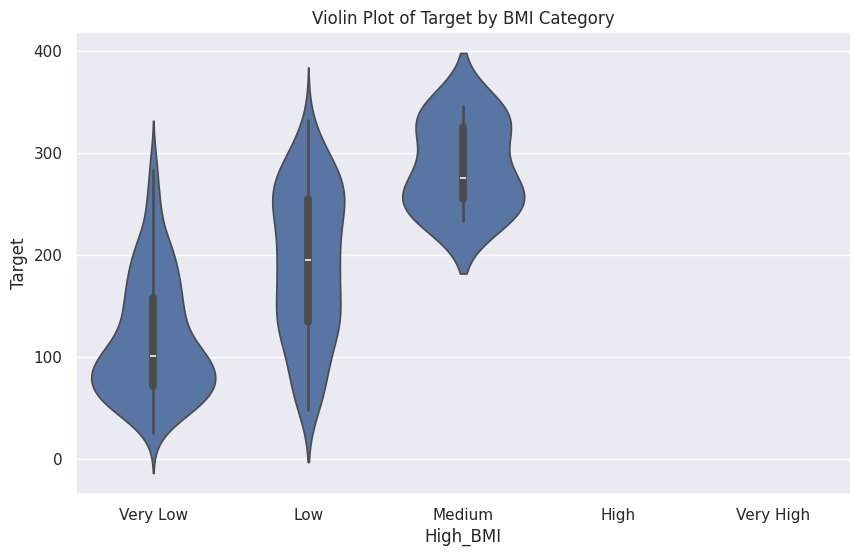

In [729]:
# Violin Plot
plt.figure(figsize=(10, 6))
sns.violinplot(x='High_BMI', y='Target', data=df)
plt.title('Violin Plot of Target by BMI Category')
plt.show()


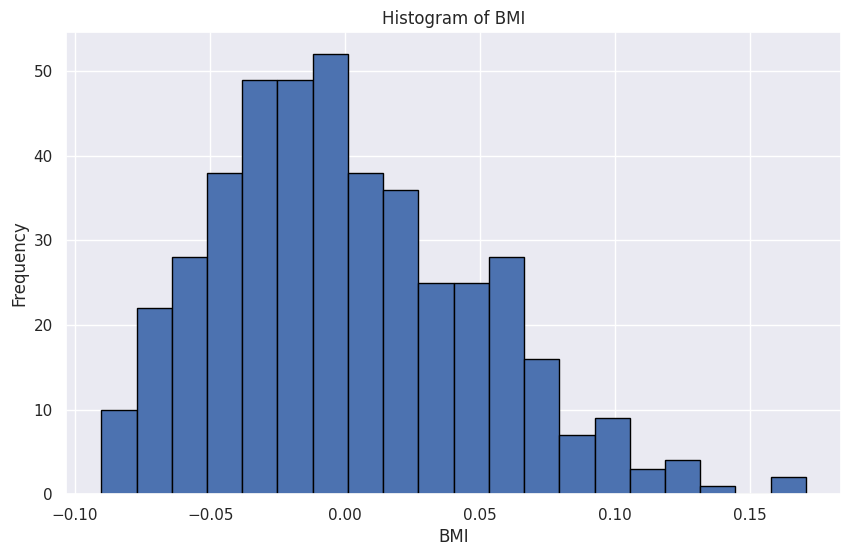

In [730]:
# Histogram
plt.figure(figsize=(10, 6))
plt.hist(df['bmi'], bins=20, edgecolor='black')
plt.title('Histogram of BMI')
plt.xlabel('BMI')
plt.ylabel('Frequency')
plt.show()


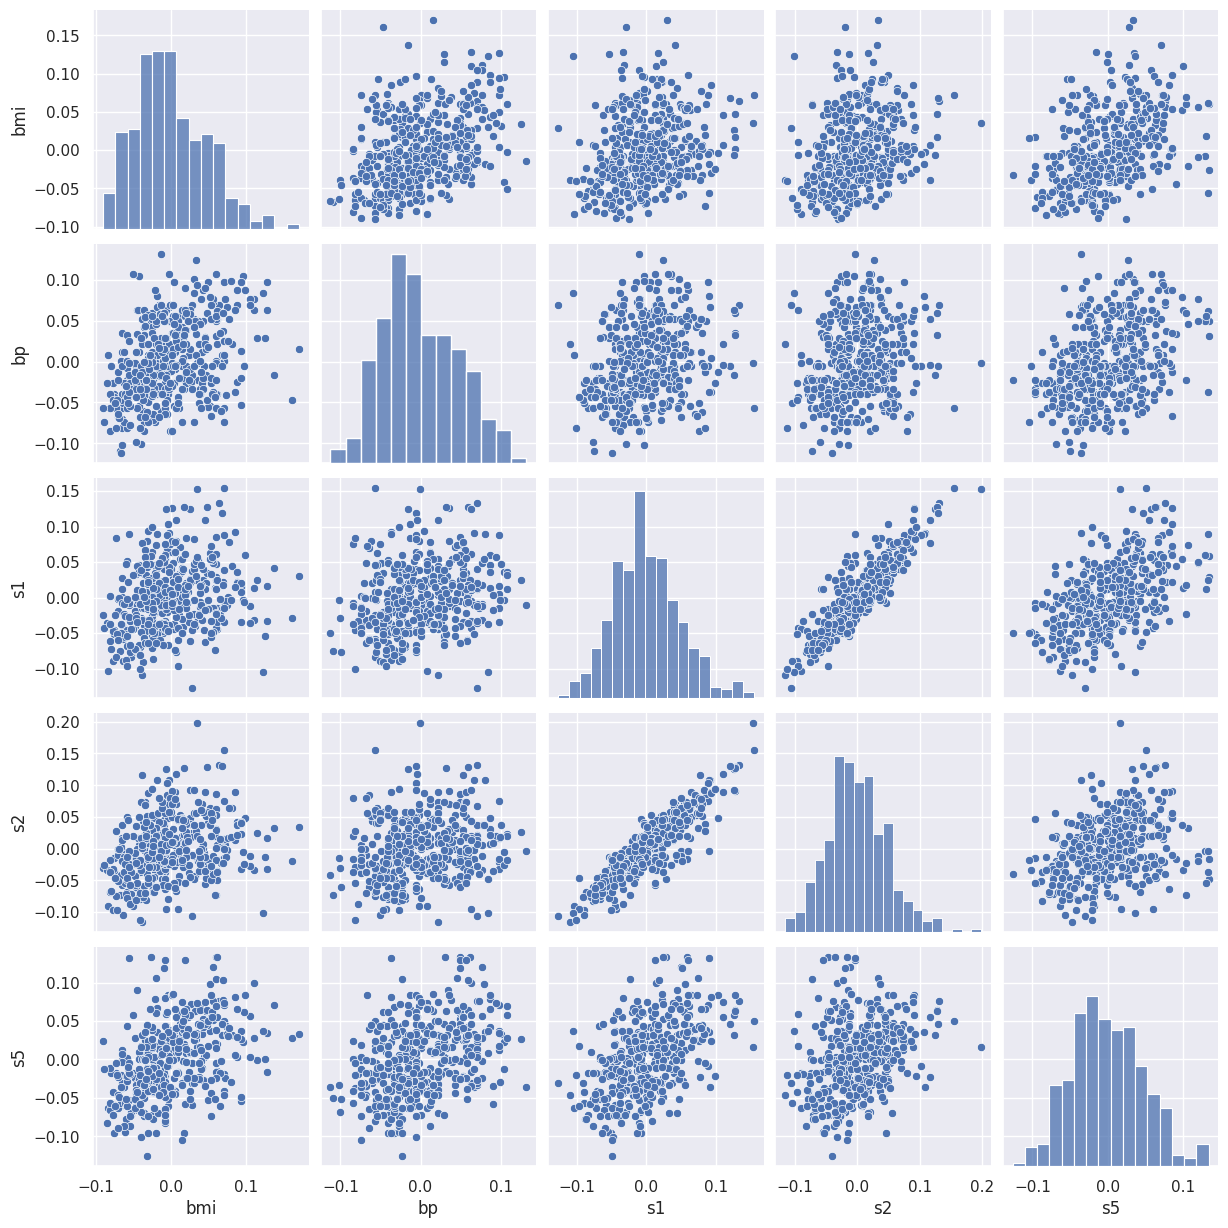

In [731]:
# Scatter Plot Matrix
sns.pairplot(df, vars=['bmi', 'bp', 's1', 's2', 's5'])
plt.show()

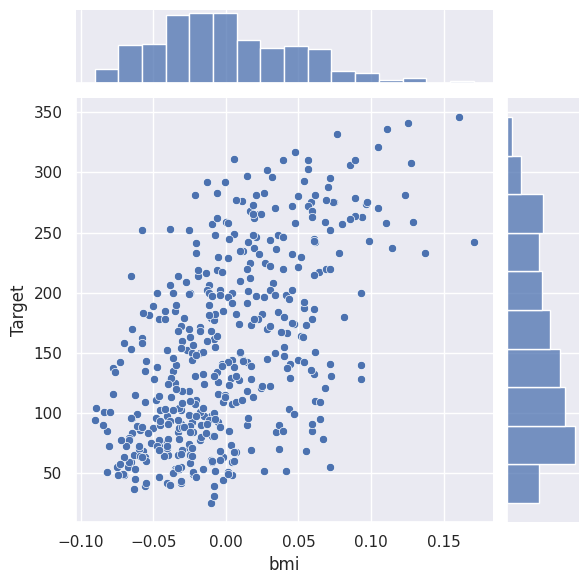

In [732]:
# Joint Plot
sns.jointplot(x='bmi', y='Target', data=df, kind='scatter')
plt.show()

In [733]:
df

age       sex       bmi        bp        s1        s2        s3  \
0    0.038076  0.050680  0.061696  0.021872 -0.044223 -0.034821 -0.043401   
1   -0.001882 -0.044642 -0.051474 -0.026328 -0.008449 -0.019163  0.074412   
2    0.085299  0.050680  0.044451 -0.005670 -0.045599 -0.034194 -0.032356   
3   -0.089063 -0.044642 -0.011595 -0.036656  0.012191  0.024991 -0.036038   
4    0.005383 -0.044642 -0.036385  0.021872  0.003935  0.015596  0.008142   
..        ...       ...       ...       ...       ...       ...       ...   
437  0.041708  0.050680  0.019662  0.059744 -0.005697 -0.002566 -0.028674   
438 -0.005515  0.050680 -0.015906 -0.067642  0.049341  0.079165 -0.028674   
439  0.041708  0.050680 -0.015906  0.017293 -0.037344 -0.013840 -0.024993   
440 -0.045472 -0.044642  0.039062  0.001215  0.016318  0.015283 -0.028674   
441 -0.045472 -0.044642 -0.073030 -0.081413  0.083740  0.027809  0.173816   

           s4        s5        s6  Target  High_BMI  
0   -0.002592  0.019907 -0.017646   151.0       Low  
1   -0.039493 -0.068332 -0.092204    75.0  Very Low  
2   -0.002592  0.002861 -0.025930   141.0       Low  
3    0.034309  0.022688 -0.009362   206.0  Very Low  
4   -0.002592 -0.031988 -0.046641   135.0  Very Low  
..        ...       ...       ...     ...       ...  
437 -0.002592  0.031193  0.007207   178.0       Low  
438  0.034309 -0.018114  0.044485   104.0  Very Low  
439 -0.011080 -0.046883  0.015491   132.0  Very Low  
440  0.026560  0.044529 -0.025930   220.0       Low  
441 -0.039493 -0.004222  0.003064    57.0  Very Low  

[442 rows x 12 columns]

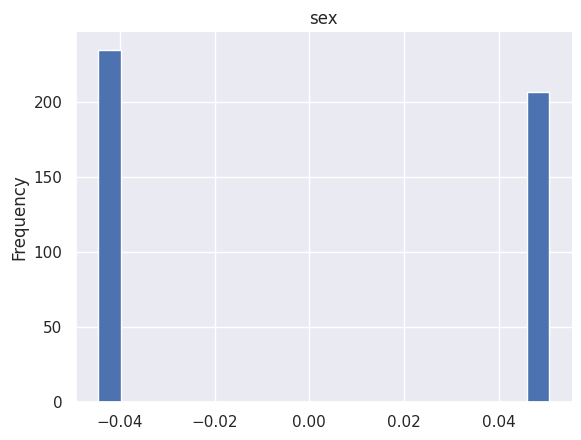

In [734]:
# @title sex

from matplotlib import pyplot as plt
df['sex'].plot(kind='hist', bins=20, title='sex')
plt.gca().spines[['top', 'right',]].set_visible(False)

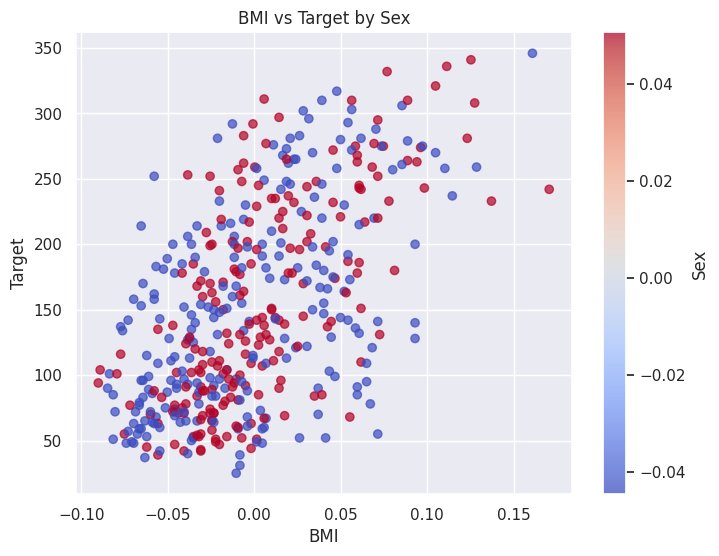

In [735]:
# @title BMI vs Target by Sex

import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.scatter(df['bmi'], df['Target'], c=df['sex'], cmap='coolwarm', alpha=0.7)
plt.xlabel('BMI')
plt.ylabel('Target')
plt.title('BMI vs Target by Sex')
_ = plt.colorbar(label='Sex')

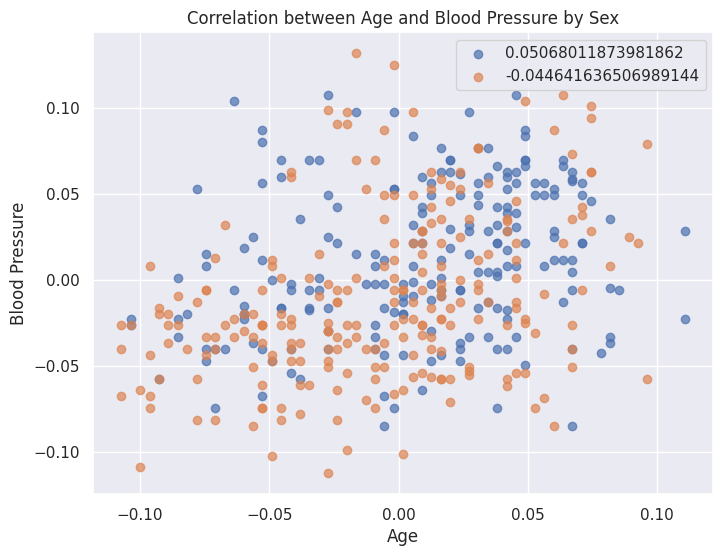

In [736]:
# @title Correlation between Age and Blood Pressure by Sex

import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame

plt.figure(figsize=(8, 6))

# Scatter plot for one sex
plt.scatter(df[df['sex'] == df['sex'].unique()[0]]['age'],
            df[df['sex'] == df['sex'].unique()[0]]['bp'],
            label=df['sex'].unique()[0], alpha=0.7)

# Scatter plot for the other sex
plt.scatter(df[df['sex'] == df['sex'].unique()[1]]['age'],
            df[df['sex'] == df['sex'].unique()[1]]['bp'],
            label=df['sex'].unique()[1], alpha=0.7)

plt.xlabel('Age')
plt.ylabel('Blood Pressure')
plt.title('Correlation between Age and Blood Pressure by Sex')
_ = plt.legend()

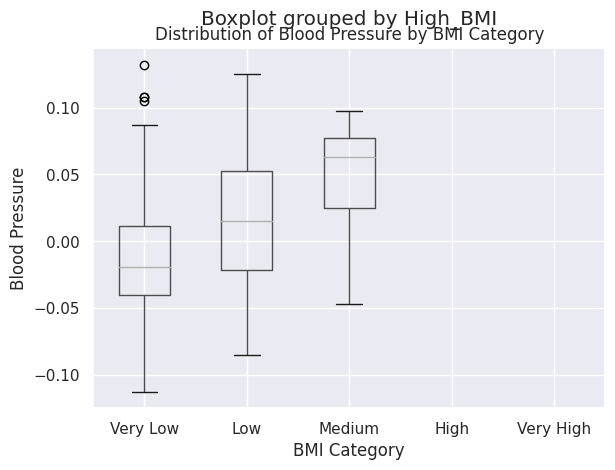

In [737]:
# @title Distribution of Blood Pressure by BMI Category

import matplotlib.pyplot as plt

df.boxplot(column='bp', by='High_BMI')
plt.xlabel('BMI Category')
plt.ylabel('Blood Pressure')
_ = plt.title('Distribution of Blood Pressure by BMI Category')

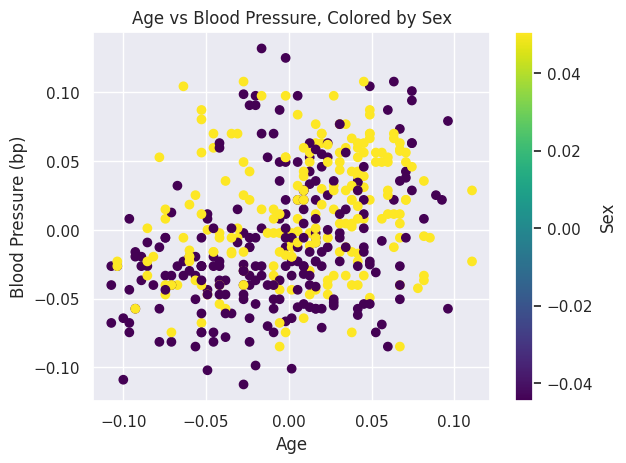

In [738]:
# @title Age vs Blood Pressure, Colored by Sex

import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame

plt.scatter(df['age'], df['bp'], c=df['sex'], cmap='viridis')
plt.xlabel('Age')
plt.ylabel('Blood Pressure (bp)')
plt.title('Age vs Blood Pressure, Colored by Sex')
_ = plt.colorbar(label='Sex')

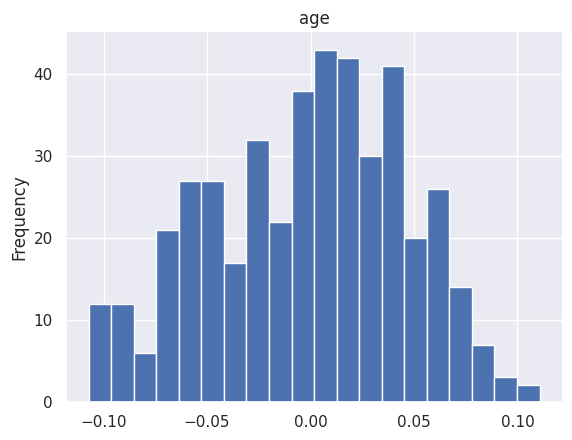

In [739]:
# @title age

from matplotlib import pyplot as plt
df['age'].plot(kind='hist', bins=20, title='age')
plt.gca().spines[['top', 'right',]].set_visible(False)

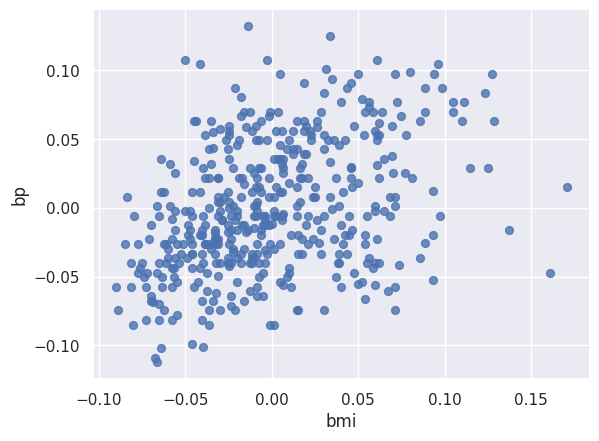

In [740]:
# @title bmi vs bp

from matplotlib import pyplot as plt
df.plot(kind='scatter', x='bmi', y='bp', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

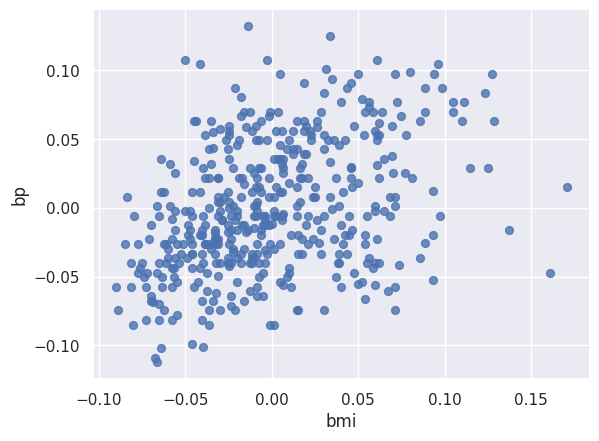

In [741]:
# @title bmi vs bp

from matplotlib import pyplot as plt
df.plot(kind='scatter', x='bmi', y='bp', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

In [742]:
df.columns

Index(['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6', 'Target',
       'High_BMI'],
      dtype='object')

In [743]:
df.dtypes

age          float64
sex          float64
bmi          float64
bp           float64
s1           float64
s2           float64
s3           float64
s4           float64
s5           float64
s6           float64
Target       float64
High_BMI    category
dtype: object

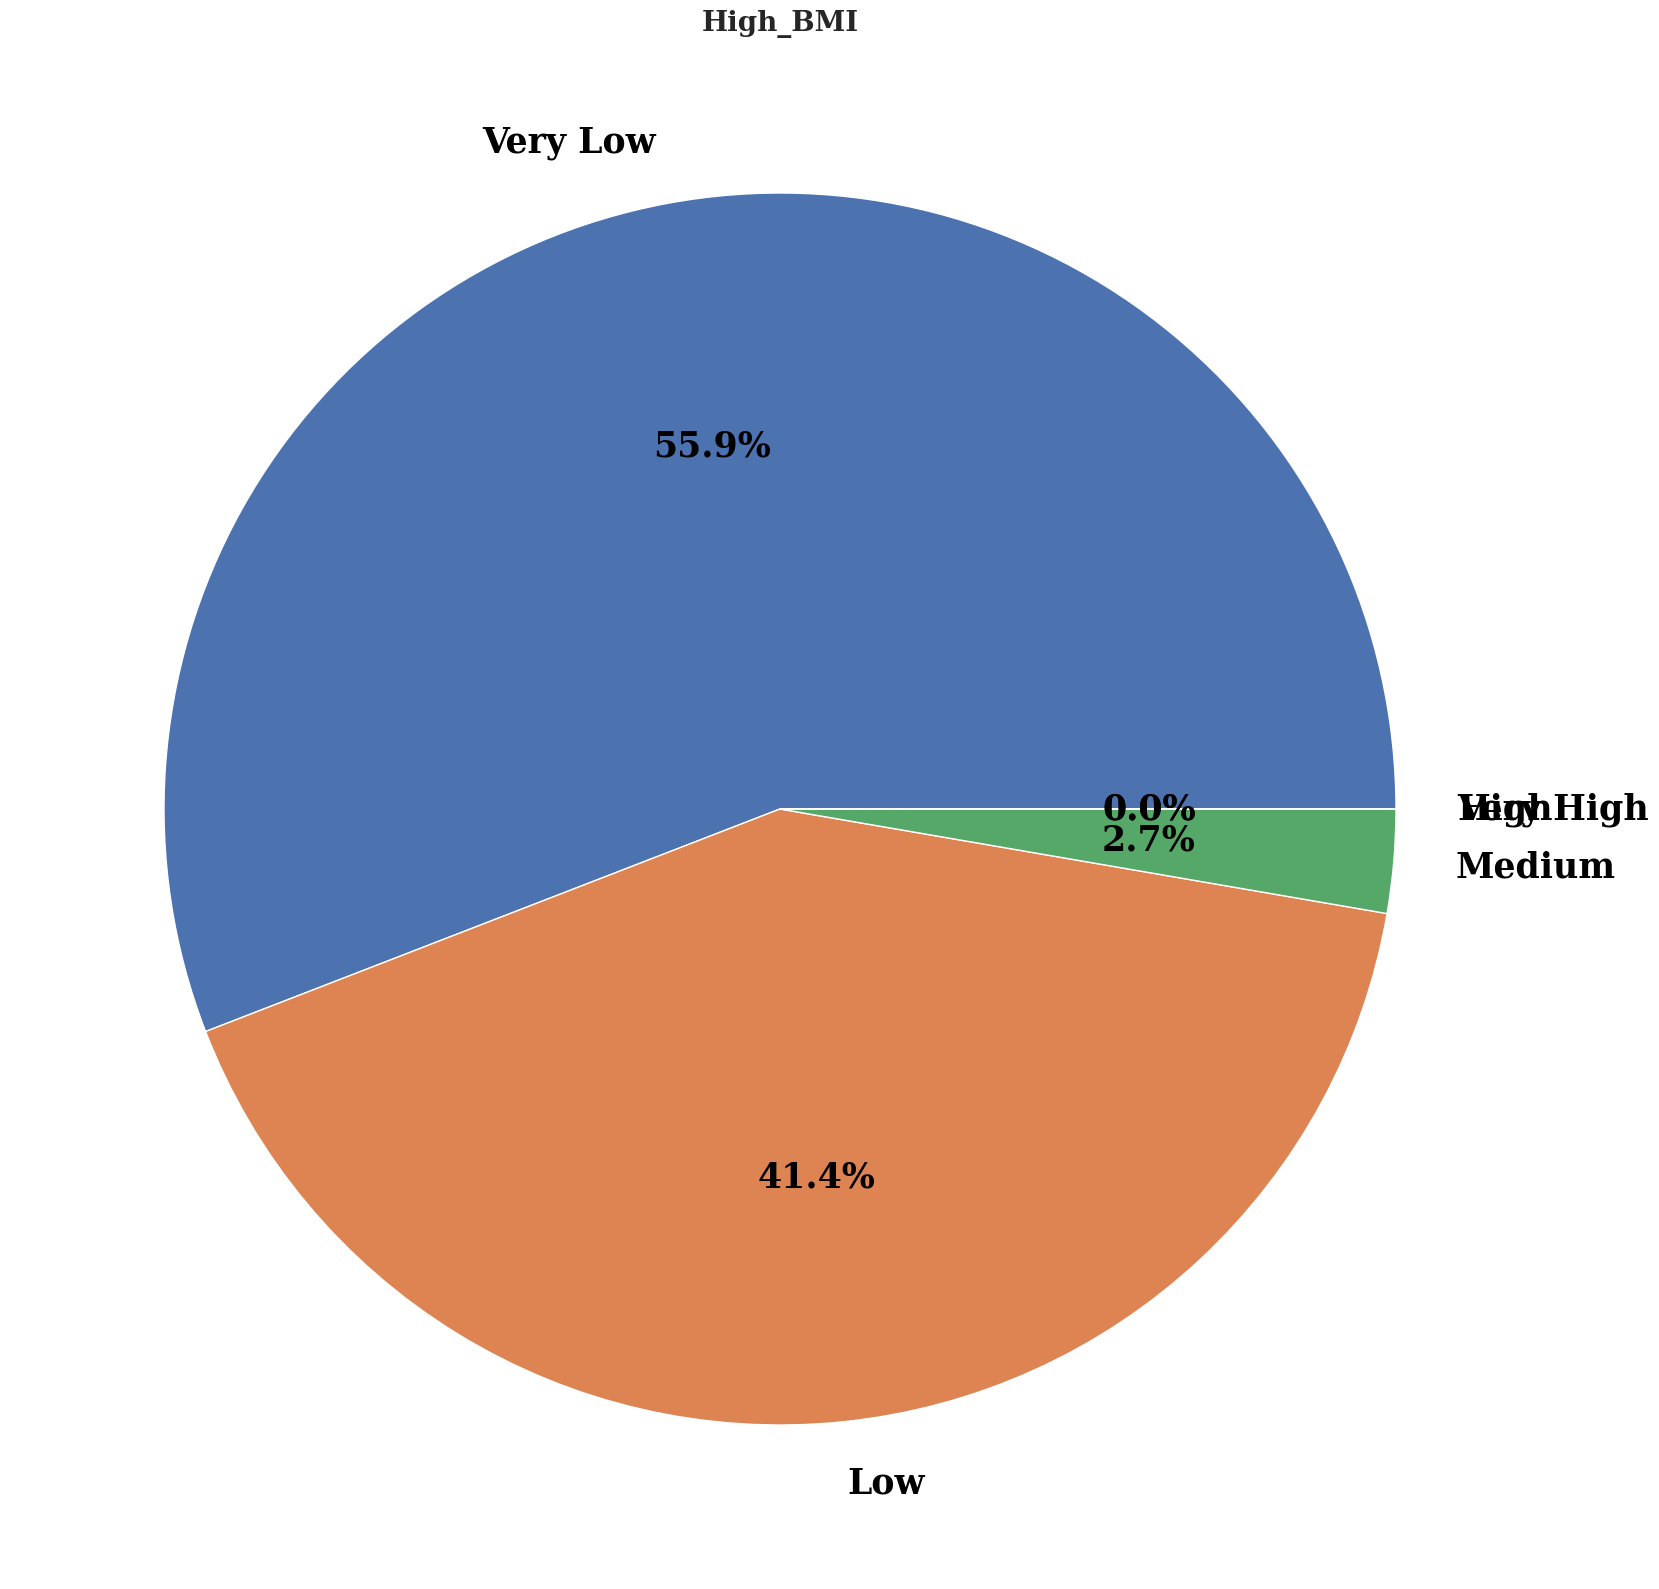

In [744]:
plt.figure(figsize=(30,20))
plt.pie(df['High_BMI'].value_counts(), labels=df['High_BMI'].value_counts().index,
       autopct='%1.1f%%', textprops={'fontsize':25, 'color':'black','weight':'bold',
                                    'family':'serif'})
hfont = {'fontname':'serif', 'weight':'bold'}
plt.title('High_BMI', size=20, **hfont)
plt.show()

# **USING LABEL ENCODING TO ENCODE HIGH_BMI**

---



In [745]:
from sklearn.preprocessing import LabelEncoder

# Example of Label Encoding 'High_BMI' if it's not already encoded
le = LabelEncoder()
df['High_BMI'] = le.fit_transform(df['High_BMI'])

In [746]:
df.head()

age       sex       bmi        bp        s1        s2        s3  \
0  0.038076  0.050680  0.061696  0.021872 -0.044223 -0.034821 -0.043401   
1 -0.001882 -0.044642 -0.051474 -0.026328 -0.008449 -0.019163  0.074412   
2  0.085299  0.050680  0.044451 -0.005670 -0.045599 -0.034194 -0.032356   
3 -0.089063 -0.044642 -0.011595 -0.036656  0.012191  0.024991 -0.036038   
4  0.005383 -0.044642 -0.036385  0.021872  0.003935  0.015596  0.008142   

         s4        s5        s6  Target  High_BMI  
0 -0.002592  0.019907 -0.017646   151.0         0  
1 -0.039493 -0.068332 -0.092204    75.0         2  
2 -0.002592  0.002861 -0.025930   141.0         0  
3  0.034309  0.022688 -0.009362   206.0         2  
4 -0.002592 -0.031988 -0.046641   135.0         2

In [747]:
#df.drop('High_BMI', inplace = True, axis =1)

In [748]:
df.columns

Index(['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6', 'Target',
       'High_BMI'],
      dtype='object')

In [749]:
df

age       sex       bmi        bp        s1        s2        s3  \
0    0.038076  0.050680  0.061696  0.021872 -0.044223 -0.034821 -0.043401   
1   -0.001882 -0.044642 -0.051474 -0.026328 -0.008449 -0.019163  0.074412   
2    0.085299  0.050680  0.044451 -0.005670 -0.045599 -0.034194 -0.032356   
3   -0.089063 -0.044642 -0.011595 -0.036656  0.012191  0.024991 -0.036038   
4    0.005383 -0.044642 -0.036385  0.021872  0.003935  0.015596  0.008142   
..        ...       ...       ...       ...       ...       ...       ...   
437  0.041708  0.050680  0.019662  0.059744 -0.005697 -0.002566 -0.028674   
438 -0.005515  0.050680 -0.015906 -0.067642  0.049341  0.079165 -0.028674   
439  0.041708  0.050680 -0.015906  0.017293 -0.037344 -0.013840 -0.024993   
440 -0.045472 -0.044642  0.039062  0.001215  0.016318  0.015283 -0.028674   
441 -0.045472 -0.044642 -0.073030 -0.081413  0.083740  0.027809  0.173816   

           s4        s5        s6  Target  High_BMI  
0   -0.002592  0.019907 -0.017646   151.0         0  
1   -0.039493 -0.068332 -0.092204    75.0         2  
2   -0.002592  0.002861 -0.025930   141.0         0  
3    0.034309  0.022688 -0.009362   206.0         2  
4   -0.002592 -0.031988 -0.046641   135.0         2  
..        ...       ...       ...     ...       ...  
437 -0.002592  0.031193  0.007207   178.0         0  
438  0.034309 -0.018114  0.044485   104.0         2  
439 -0.011080 -0.046883  0.015491   132.0         2  
440  0.026560  0.044529 -0.025930   220.0         0  
441 -0.039493 -0.004222  0.003064    57.0         2  

[442 rows x 12 columns]

In [750]:
df.shape

(442, 12)

# **Define Independent and Dependent variables**

---



In [751]:
x = df.drop(['Target'], axis = 1)
y = df['Target']

In [752]:
x

age       sex       bmi        bp        s1        s2        s3  \
0    0.038076  0.050680  0.061696  0.021872 -0.044223 -0.034821 -0.043401   
1   -0.001882 -0.044642 -0.051474 -0.026328 -0.008449 -0.019163  0.074412   
2    0.085299  0.050680  0.044451 -0.005670 -0.045599 -0.034194 -0.032356   
3   -0.089063 -0.044642 -0.011595 -0.036656  0.012191  0.024991 -0.036038   
4    0.005383 -0.044642 -0.036385  0.021872  0.003935  0.015596  0.008142   
..        ...       ...       ...       ...       ...       ...       ...   
437  0.041708  0.050680  0.019662  0.059744 -0.005697 -0.002566 -0.028674   
438 -0.005515  0.050680 -0.015906 -0.067642  0.049341  0.079165 -0.028674   
439  0.041708  0.050680 -0.015906  0.017293 -0.037344 -0.013840 -0.024993   
440 -0.045472 -0.044642  0.039062  0.001215  0.016318  0.015283 -0.028674   
441 -0.045472 -0.044642 -0.073030 -0.081413  0.083740  0.027809  0.173816   

           s4        s5        s6  High_BMI  
0   -0.002592  0.019907 -0.017646         0  
1   -0.039493 -0.068332 -0.092204         2  
2   -0.002592  0.002861 -0.025930         0  
3    0.034309  0.022688 -0.009362         2  
4   -0.002592 -0.031988 -0.046641         2  
..        ...       ...       ...       ...  
437 -0.002592  0.031193  0.007207         0  
438  0.034309 -0.018114  0.044485         2  
439 -0.011080 -0.046883  0.015491         2  
440  0.026560  0.044529 -0.025930         0  
441 -0.039493 -0.004222  0.003064         2  

[442 rows x 11 columns]

In [753]:
y

0      151.0
1       75.0
2      141.0
3      206.0
4      135.0
       ...  
437    178.0
438    104.0
439    132.0
440    220.0
441     57.0
Name: Target, Length: 442, dtype: float64

In [754]:
"""
# Feature scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler_x = scaler.fit_transform(x)
"""

'\n# Feature scaling\nfrom sklearn.preprocessing import StandardScaler\nscaler = StandardScaler()\nscaler_x = scaler.fit_transform(x)\n'

In [755]:
#scaler_x

In [756]:
y.head()

0    151.0
1     75.0
2    141.0
3    206.0
4    135.0
Name: Target, dtype: float64

In [757]:
y.value_counts()

Target
200.0    6
72.0     6
90.0     5
178.0    5
71.0     5
        ..
73.0     1
222.0    1
86.0     1
79.0     1
57.0     1
Name: count, Length: 214, dtype: int64

# **Split dataset into training and testing for Decision Tree**

In [758]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x, y,test_size = 0.30, random_state=100)

In [759]:
#from sklearn.model_selection import train_test_split
#x_train,x_test,y_train,y_test = train_test_split(scaler_x, y,test_size = 0.30, random_state=100)

# **MODEL BUILDING:**

---



# **DECISION TREE REGRESSOR**

---



In [760]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
from sklearn import metrics

In [761]:
dt = DecisionTreeRegressor()
dt.fit(x_train, y_train)

DecisionTreeRegressor()

# **Predictions on test and train data**

---



In [762]:
y_pred_test = dt.predict(x_test)
y_pred_train = dt.predict(x_train)

In [763]:
print('Train MSE:', mean_squared_error(y_train, y_pred_train))
print('Test MSE:', mean_squared_error(y_test, y_pred_test))
print()
print('RMSE of Test :', np.sqrt(mean_squared_error(y_test, y_pred_test)))
print('RMSE of Train :', np.sqrt(mean_squared_error(y_train, y_pred_train)))
print()
print("MAPE of Test:", metrics.mean_absolute_percentage_error(y_test, y_pred_test)*100)
print("MAPE of train:", metrics.mean_absolute_percentage_error(y_train, y_pred_train)*100)
print()
print("MAE of test:", metrics.mean_absolute_error(y_test, y_pred_test))
print("MAE of train:", metrics.mean_absolute_error(y_train, y_pred_train))

Train MSE: 0.0
Test MSE: 5571.789473684211

RMSE of Test : 74.64442024481275
RMSE of Train : 0.0

MAPE of Test: 53.93869906998183
MAPE of train: 0.0

MAE of test: 56.421052631578945
MAE of train: 0.0



It looks like your Decision Tree Regressor is overfitting the training data.
The training Mean Squared Error is 0.

# Suggestions to Improve Model Performance

---


Prune the Tree: By pruning the tree, you can prevent it from learning too much noise in the training data.
dt = DecisionTreeRegressor(max_depth=10, min_samples_split=5, min_samples_leaf=5)
dt.fit(x_train, y_train)


use cross validation
To address overfitting, consider the following steps:

Prune the Decision Tree: Limit the depth of the tree or the number of leaf nodes.

Use Ensemble Methods: Techniques like Random Forests or Gradient Boosting can help generalize better.

Cross-Validation: Implement cross-validation to get a better estimate of model performance.

Feature Engineering: Improve the quality of input features.

Regularization: Apply regularization techniques to penalize complex models.

In [764]:
dt_score_test=r2_score(y_pred_test,y_test)
print("r2_score of tests:", dt_score_test)

r2_score of tests: 0.1046803129161864


In [765]:
dt_score_train = r2_score(y_pred_train, y_train)
print("r2_score of train:",dt_score_train)

r2_score of train: 1.0


# **HYPERPARAMETER TUNING**

---



In [766]:
from sklearn.metrics import r2_score , mean_squared_error
from sklearn.model_selection import GridSearchCV, cross_val_score

In [767]:
## Hyperparameter Tunning
parameter={
 'criterion':['squared_error','friedman_mse','absolute_error','poisson'],
  'splitter':['best','random'],
  'max_depth':[1,2,3,4,5,6,7,8,10,11,12],
  'max_features':['auto', 'sqrt', 'log2']

}
dt = DecisionTreeRegressor()

Method1: to find cross **validation**

In [768]:
cv_score1_train = cross_val_score(dt, x_train, y_train, cv=10, scoring='r2').mean()
cv_score2_test = cross_val_score(dt, x_test, y_test, cv=10, scoring='r2').mean()
print(cv_score1_train)
print(cv_score2_test)

-0.038473196810785926
-0.17213016295550693


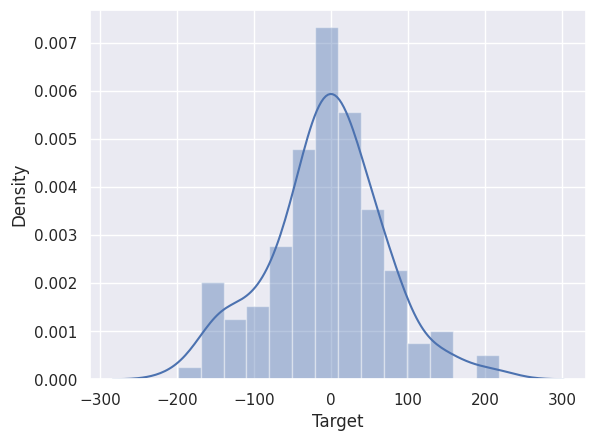

In [769]:
# dist plot for difference
sns.distplot(y_test - y_pred_test)
plt.show()

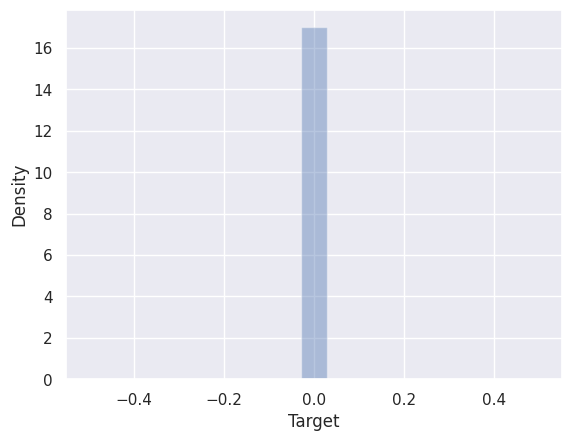

In [770]:
# dist plot for difference for train
sns.distplot(y_train - y_pred_train)
plt.show()

In [771]:
print('Accuracy of Test:',metrics.r2_score(y_test, y_pred_test))

Accuracy of Test: -0.051399819170048655


In [772]:
print('Accuracy of Train:',metrics.r2_score(y_train, y_pred_train))

Accuracy of Train: 1.0


# **Cross validation**

---

Method2:

In [773]:
dt_regressorcv=GridSearchCV(dt,param_grid=parameter,cv=2,scoring='neg_mean_squared_error')

In [774]:
dt_regressorcv.fit(x_train,y_train)

GridSearchCV(cv=2, estimator=DecisionTreeRegressor(),
             param_grid={'criterion': ['squared_error', 'friedman_mse',
                                       'absolute_error', 'poisson'],
                         'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 10, 11, 12],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'splitter': ['best', 'random']},
             scoring='neg_mean_squared_error')

In [775]:
dt_regressorcv.best_params_

{'criterion': 'friedman_mse',
 'max_depth': 3,
 'max_features': 'auto',
 'splitter': 'random'}

substitute best parameters found to **dt**

---



Give the best parameter criteria found to the dt

In [776]:
# Get the best parameters
best_params = dt_regressorcv.best_params_
print("Best Parameters found: ", best_params)

# Initialize a new Decision Tree Regressor with the best parameters
dt_best = DecisionTreeRegressor(**best_params)

# Fit the model to the training data
dt_best.fit(x_train, y_train)

Best Parameters found:  {'criterion': 'friedman_mse', 'max_depth': 3, 'max_features': 'auto', 'splitter': 'random'}


DecisionTreeRegressor(criterion='friedman_mse', max_depth=3,
                      max_features='auto', splitter='random')

In [777]:
#dt=DecisionTreeRegressor(criterion='poisson',max_depth=4,max_features='auto',splitter='random')

In [778]:
#dt.fit(x_train,y_train)

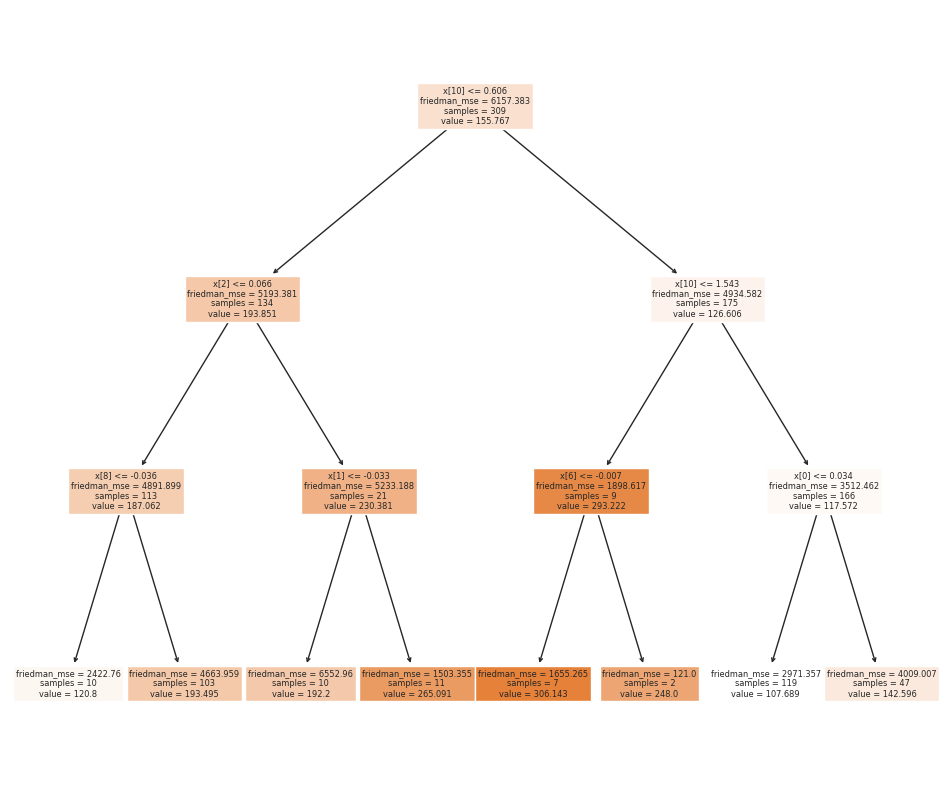

In [779]:
from sklearn import tree
plt.figure(figsize=(12,10))
tree.plot_tree(dt_best,filled=True)
plt.show()

# **Predictions using best params**

---



# **Predictions on Test data**

---



In [780]:
# Predict using the best model
y_pred_train = dt_best.predict(x_train)
y_pred_test = dt_best.predict(x_test)

In [781]:
#y_pred_test =dt_regressorcv.predict(x_test)
print("Prediction using best parameters on Test data:", y_pred_test)

Prediction using best parameters on Test data: [107.68907563 107.68907563 193.49514563 107.68907563 142.59574468
 107.68907563 107.68907563 193.49514563 142.59574468 192.2
 193.49514563 193.49514563 192.2        193.49514563 107.68907563
 107.68907563 107.68907563 107.68907563 193.49514563 120.8
 265.09090909 193.49514563 107.68907563 193.49514563 193.49514563
 107.68907563 306.14285714 142.59574468 193.49514563 193.49514563
 107.68907563 193.49514563 107.68907563 107.68907563 107.68907563
 193.49514563 193.49514563 142.59574468 193.49514563 265.09090909
 107.68907563 193.49514563 107.68907563 107.68907563 142.59574468
 107.68907563 120.8        107.68907563 193.49514563 120.8
 193.49514563 107.68907563 193.49514563 107.68907563 107.68907563
 107.68907563 107.68907563 306.14285714 107.68907563 107.68907563
 107.68907563 107.68907563 142.59574468 193.49514563 193.49514563
 107.68907563 107.68907563 107.68907563 107.68907563 142.59574468
 142.59574468 107.68907563 107.68907563 193.495145

In [782]:
r2_score(y_pred_test,y_test)

-0.5944075807460316

In [783]:
print("Accuracy of Test data:", metrics.r2_score(y_test, y_pred_test))

Accuracy of Test data: 0.2787647215718434


# **Prediction on Train data\**

---



In [784]:
#y_pred_train = dt_regressorcv.predict(x_train)
y_pred_train = dt_best.predict(x_train)
print("Prediction using best parameters on Train data:", y_pred_train)

Prediction using best parameters on Train data: [107.68907563 107.68907563 192.2        142.59574468 193.49514563
 107.68907563 142.59574468 107.68907563 107.68907563 107.68907563
 107.68907563 107.68907563 107.68907563 107.68907563 107.68907563
 107.68907563 142.59574468 107.68907563 142.59574468 107.68907563
 107.68907563 107.68907563 193.49514563 142.59574468 142.59574468
 193.49514563 107.68907563 107.68907563 142.59574468 107.68907563
 142.59574468 142.59574468 120.8        193.49514563 142.59574468
 193.49514563 107.68907563 142.59574468 107.68907563 193.49514563
 193.49514563 107.68907563 107.68907563 142.59574468 193.49514563
 192.2        142.59574468 107.68907563 107.68907563 107.68907563
 120.8        107.68907563 193.49514563 193.49514563 120.8
 193.49514563 142.59574468 193.49514563 107.68907563 142.59574468
 306.14285714 142.59574468 306.14285714 120.8        193.49514563
 193.49514563 107.68907563 193.49514563 193.49514563 193.49514563
 142.59574468 107.68907563 193.4951

In [785]:
r2_score(y_pred_train,y_train)

-0.49654508149499166

In [786]:
# Calculate performance metrics using best
print('Train MSE:', metrics.mean_squared_error(y_train, y_pred_train))
print('Test MSE:', metrics.mean_squared_error(y_test, y_pred_test))
print()
print('RMSE of Test:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_test)))
print('RMSE of Train:', np.sqrt(metrics.mean_squared_error(y_train, y_pred_train)))
print()
print("MAPE of Test:", metrics.mean_absolute_percentage_error(y_test, y_pred_test) * 100)
print("MAPE of Train:", metrics.mean_absolute_percentage_error(y_train, y_pred_train) * 100)
print()
print("MAE of Test:", metrics.mean_absolute_error(y_test, y_pred_test))
print("MAE of Train:", metrics.mean_absolute_error(y_train, y_pred_train))
print()
print("R2 Score of Test:", metrics.r2_score(y_test, y_pred_test))
print("R2 Score of Train:", metrics.r2_score(y_train, y_pred_train))

Train MSE: 3691.0211286531953
Test MSE: 3822.1151070464075

RMSE of Test: 61.82325700775079
RMSE of Train: 60.75377460416098

MAPE of Test: 48.80158072699714
MAPE of Train: 44.8432593944261

MAE of Test: 50.93275806374514
MAE of Train: 50.63289416036741

R2 Score of Test: 0.2787647215718434
R2 Score of Train: 0.4005535519515536


The output metrics suggest that the model's performance has improved, but it still exhibits a considerable amount of error and some overfitting.

Mean Squared Error (MSE)

Train MSE: 3691.0211286531953
Test MSE: 3822.1151070464075
Root Mean Squared Error (RMSE)

RMSE of Test: 61.82325700775079
RMSE of Train: 60.75377460416098
Mean Absolute Percentage Error (MAPE)

MAPE of Test: 48.80158072699714
MAPE of Train: 44.8432593944261
Mean Absolute Error (MAE)

MAE of Test: 50.93275806374514
MAE of Train: 50.63289416036741
R2 Score

R2 Score of Test: 0.2787647215718434
R2 Score of Train: 0.4005535519515536
Interpretation and Next Steps:
Overfitting: The difference between the training and testing R2 scores suggests overfitting. Although the model fits the training data reasonably well (R2 of 0.462), its performance on the test data is significantly worse (R2 of 0.291).
High Errors: The errors (MSE, RMSE, MAPE, MAE) are quite high, indicating that the model's predictions are not very accurate.
Recommendations to Improve the Model:
Feature Engineering:

Add More Features: Include additional relevant features that might help the model better understand the underlying patterns.
Feature Selection: Remove irrelevant or noisy features.
Feature Transformation: Apply transformations like log, sqrt, or polynomial features to capture non-linear relationships.
Regularization:

Consider using a model with built-in regularization like Lasso, Ridge, or ElasticNet regression to penalize complex models and reduce overfitting.
Ensemble Methods:

Random Forest Regressor: It’s less likely to overfit compared to a single decision tree.
Gradient Boosting Regressor: It can often provide better performance by combining the predictions of multiple weak learners.
Cross-Validation:

Use cross-validation techniques like k-fold cross-validation to ensure the model's robustness and generalizability.
Hyperparameter Tuning:

Continue fine-tuning hyperparameters using techniques like GridSearchCV or RandomizedSearchCV.
